In [ ]:
!pip install opencv-python

In [2]:
import cv2 
import matplotlib.pyplot as plt 

In [3]:
confile_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model =cv2.dnn_DetectionModel(frozen_model,confile_file)

In [5]:
classLabels=[]
file_name ='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
classLabels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002615D416170>

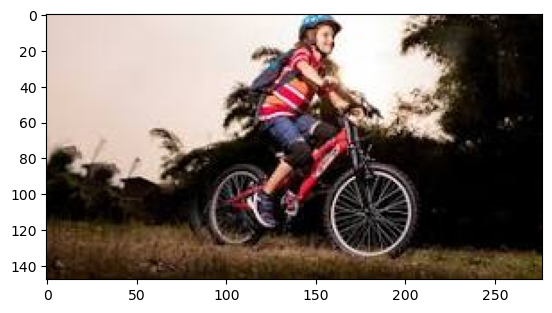

In [10]:
img = cv2.imread('object 1.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [11]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[4 1 4]


In [13]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255, 255, 255),thickness=3)
    

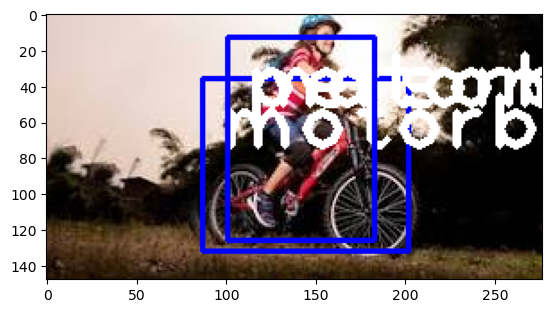

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
# For Videos

cap = cv2.VideoCapture("traffic.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Check the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, 
                            fontScale=font_scale, color=(255, 255, 255), thickness=3)
                print("Detected Object:", classLabels[ClassInd-1])

    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: truck
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detecte

Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: truck
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: truck
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car

Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: truck
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detec

Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: truck
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Ob

Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: bird
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: car
Detected Object: truck


In [2]:
# For Webcame

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Check the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, 
                            fontScale=font_scale, color=(255, 255, 255), thickness=3)
                print("Detected Object:", classLabels[ClassInd-1])

    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined